In [1]:
!pip install Pillow

In [22]:
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ
from qiskit import transpile, assemble, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from math import pi
from PIL import Image, ImageOps
from resizeimage import resizeimage
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sys.path.append('..')
sys.path.append('data1')

In [90]:
def QuantumCircuittest():
    
    theta = pi/4 # all pixels black
    qc = QuantumCircuit(3)


    qc.h(0)
    qc.h(1)

    qc.barrier()
#Pixel 1

    qc.cry(theta,0,2)
    qc.cx(0,1)
    qc.cry(-theta,1,2)
    qc.cx(0,1)
    qc.cry(theta,1,2)

    qc.barrier()
#Pixel 2

    qc.x(1)
    qc.cry(theta,0,2)
    qc.cx(0,1)
    qc.cry(-theta,1,2)
    qc.cx(0,1)
    qc.cry(theta,1,2)

    qc.barrier()

    qc.x(1)
    qc.x(0)
    qc.cry(theta,0,2)
    qc.cx(0,1)
    qc.cry(-theta,1,2)
    qc.cx(0,1)
    qc.cry(theta,1,2)


    qc.barrier()

    qc.x(1)

    qc.cry(theta,0,2)
    qc.cx(0,1)
    qc.cry(-theta,1,2)
    qc.cx(0,1)
    qc.cry(theta,1,2)

In [91]:
def large_image_normalization(images,w,h):
    image=np.array([])
   
    for y in range(h-2,h):
         for x in range(w-2,w):
            image=np.append(image,images.getpixel((x,y))[0])
    genimg = image.reshape((2,2))
    image = image.flatten()
    # change type
    image = image.astype('float64')
    # Normalization(0~pi/2)
    image /= 255.0
    generated_image=image
    # generated_image = np.arcsin(image)
    print(generated_image)
    image=images
    return generated_image

In [92]:
def twopixel():
    return Image.open("data1/Apple_320.png").convert('LA')

In [95]:
images = twopixel()
for k in range(160):
    for j in range(160):
        normalized_image=large_image_normalization(images,2+(2*k),2+(2*j))
        genimg= np.array([])
        #anc = QuantumRegister(1, "anc")
        img = QuantumRegister(2, "img")
        anc2 = QuantumRegister(1, "anc2")
        c = ClassicalRegister(3)
        qc = QuantumCircuittest()

    #    for i in range(len(normalized_image)):
    #            if normalized_image[i] != 0:
   #                     c10mary(qc, 2 * normalized_image[i], format(i, '010b'), img[0], anc2[0], [img[j] for j in range(1,len(img))])
        #qc.measure_all()
        print(qc.depth())
        numOfShots = 1000000
        result = execute(qc, Aer.get_backend('qasm_simulator'), shots=numOfShots).result()
        for i in range(len(normalized_image)):
                try:
                        genimg = np.append(genimg,[np.sqrt(result.get_counts(qc)[format(i, '010b')+'10']/numOfShots)])
                except KeyError:
                        genimg = np.append(genimg,[0.0])

        genimg *= 32.0 * 255.0 
        genimg = genimg.astype('uint8')
        genimg = genimg.reshape((32,32))
        im=Image.fromarray(genimg)

        new_im.paste(im,(32*k,32*j))
        
new_im.show()
new_im.save('MyResult_320.png') 

[1. 1. 1. 1.]
Traceback (most recent call last):
  File "/tmp/ipykernel_438/3550807278.py", line 12, in <module>
    print(qc.depth())
AttributeError: 'NoneType' object has no attribute 'depth'

Use %tb to get the full traceback.


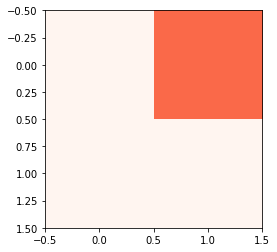

Result(backend_name='qasm_simulator', backend_version='0.9.1', qobj_id='25ed5523-7b99-4d24-914d-e5ff61c156be', job_id='7b538c12-6b3a-47b4-8602-dc699c09e91e', success=True, results=[ExperimentResult(shots=1000000, success=True, meas_level=2, data=ExperimentResultData(counts={'0xdb6db6db6db': 124636, '0x49249249249': 124921, '0x1b6db6db6db6': 124680, '0x1fffffffffff': 124626, '0x0': 125177, '0x16db6db6db6d': 125520, '0x124924924924': 124967, '0x92492492492': 125473}), header=QobjExperimentHeader(clbit_labels=[['meas', 0], ['meas', 1], ['meas', 2], ['meas0', 0], ['meas0', 1], ['meas0', 2], ['meas1', 0], ['meas1', 1], ['meas1', 2], ['meas2', 0], ['meas2', 1], ['meas2', 2], ['meas3', 0], ['meas3', 1], ['meas3', 2], ['meas4', 0], ['meas4', 1], ['meas4', 2], ['meas5', 0], ['meas5', 1], ['meas5', 2], ['meas6', 0], ['meas6', 1], ['meas6', 2], ['meas7', 0], ['meas7', 1], ['meas7', 2], ['meas8', 0], ['meas8', 1], ['meas8', 2], ['meas9', 0], ['meas9', 1], ['meas9', 2], ['meas10', 0], ['meas10', 1]

In [87]:
images = twopixel()

x_train=image_normalization(images, 2, True)
backends = Aer.backends()
qc.measure_all()
        #circuit_drawer(qc,output='mpl', filename='my_circuit_rccx.png') 
numOfShots = 1000000
result = execute(qc, Aer.get_backend('qasm_simulator'), shots=numOfShots).result()
#qc.draw()
print(result)
#print(qc.depth())


In [75]:
# generated image
genimg = np.array([])

12
Traceback (most recent call last):
  File "/tmp/ipykernel_438/2018381736.py", line 27, in <module>
    plt.imshow(genimg, cmap='gray', vmin=0, vmax=4)
  File "/opt/conda/lib/python3.8/site-packages/matplotlib/pyplot.py", line 2903, in imshow
    __ret = gca().imshow(
  File "/opt/conda/lib/python3.8/site-packages/matplotlib/__init__.py", line 1361, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py", line 5609, in imshow
    im.set_data(X)
  File "/opt/conda/lib/python3.8/site-packages/matplotlib/image.py", line 709, in set_data
    raise TypeError("Invalid shape {} for image data"
TypeError: Invalid shape (12,) for image data

Use %tb to get the full traceback.


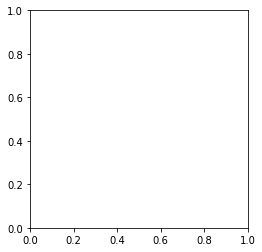

In [78]:
#### decode
size = 32

for i in range(len(normalized_image)):
    try:
        genimg = np.append(genimg,[np.sqrt(result.get_counts(qc)[format(i, '010b')+'10']/numOfShots)])
    except KeyError:
        genimg = np.append(genimg,[0.0])

        # inverse nomalization
#genimg *= 32.0 * 255.0
#x_train = np.sin(x_train)
#x_train *= 255.0

print(len(genimg))
        # inverse nomalization
genimg *= 2 * 255.0
x_train = np.sin(x_train)
x_train *= 255.0

# convert type
genimg = genimg.astype('uint')

# back to 2-dimentional data
#genimg = genimg.reshape(2,2)
#im=Image.fromarray(genimg)

plt.imshow(genimg, cmap='gray', vmin=0, vmax=4)

# plt.savefig('gen_'+str(img_num)+'.png')
new_im.paste(im,(32,32))
        
new_im.show()
new_im.save('Result2_320.png')  
